In [1]:
## Usual Imports
import numpy as np
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize

## Requires nltk.download('punkt') if not already in the environment.

In [2]:
df = pd.read_json("../data/3xNCS.json")

In [3]:
df.set_index('sentence_id')

,label,text
sentence_id,,
8967,1,"In other words, I have seen his program costed..."
27385,1,"Our Navy is old -- excuse me, our Navy is smal..."
9818,1,"The unemployment, the number of people who are..."
16794,1,Mr. Ford uh - actually has fewer people now in...
17588,1,"Today it is up to about $38,000 of earnings th..."
...,...,...
6717,0,That's not what we want.
11815,0,Imagine what it -- what it is like for someone...
33711,0,The report was so bad.


Dataset Statistics:
-------------------

Total Records: 11056

Counts by label
---------------


<AxesSubplot:ylabel='Frequency'>

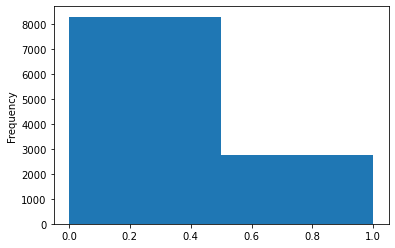

In [4]:
### Statistics about the dataset

print(f"Dataset Statistics:")
print(f"-------------------")
print(f"\nTotal Records: {len(df)}")
print("=====================================================")
print(f"\nCounts by label")
print(f"---------------")
df["label"].plot.hist(bins=2)


Sentence Count: 11056 sentences
Total Tokens: 229779 tokens
Shortest Sentence: 5 tokens
Longest Sentence: 173 tokens
Average Sentence Length: 20.78 tokens
Median Sentence Length: 17.0 tokens
5th percentile Length: 7.0 tokens
10th percentile Length: 8.0 tokens
15th percentile Length: 9.0 tokens
25th percentile Length: 11.0 tokens
95th percentile Length: 49.0 tokens
96th percentile Length: 52.0 tokens
99th percentile Length: 69.0 tokens


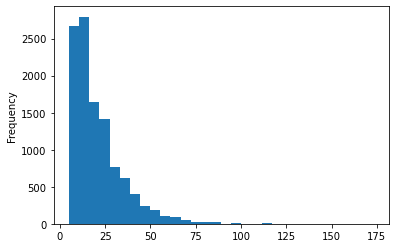

In [5]:
tokens = df["text"].map(word_tokenize)
lengths = tokens.map(len)

lengths.plot.hist(bins=30)

print(f"Sentence Count: {len(lengths)} sentences")
print(f"Total Tokens: {lengths.sum()} tokens")
print(f"Shortest Sentence: {lengths.min()} tokens")
print(f"Longest Sentence: {lengths.max()} tokens")
print(f"Average Sentence Length: {lengths.mean():.2f} tokens")
print(f"Median Sentence Length: {lengths.median()} tokens")
print(f"5th percentile Length: {lengths.quantile(0.05)} tokens")
print(f"10th percentile Length: {lengths.quantile(0.10)} tokens")
print(f"15th percentile Length: {lengths.quantile(0.15)} tokens")
print(f"25th percentile Length: {lengths.quantile(0.25)} tokens")
print(f"95th percentile Length: {lengths.quantile(0.95)} tokens")
print(f"96th percentile Length: {lengths.quantile(0.96)} tokens")
print(f"99th percentile Length: {lengths.quantile(0.99)} tokens")

In [7]:
tokens.flatten()

AttributeError: 'Series' object has no attribute 'flatten'

### Comments

1. Will need to consider the filter sizes based on the overall lengths of most sentences, as a quarter of sentences are 11 words or fewer. 
2. Does that mean that I cannot have a filter any larger than 5 words in the convolutional layer?
2. I could use padding if I wanted to go any larger than that, which may be needed for context.  I could do 8 or 9 as there are only 15% where I would need padding to run the filter.

### Dataset Citations

@inproceedings{arslan2020claimbuster,
    title={{A Benchmark Dataset of Check-worthy Factual Claims}},
    author={Arslan, Fatma and Hassan, Naeemul and Li, Chengkai and Tremayne, Mark },
    booktitle={14th International AAAI Conference on Web and Social Media},
    year={2020},
    organization={AAAI}
}

@article{meng2020gradient,
  title={Gradient-Based Adversarial Training on Transformer Networks for Detecting Check-Worthy Factual Claims},
  author={Meng, Kevin and Jimenez, Damian and Arslan, Fatma and Devasier, Jacob Daniel and Obembe, Daniel and Li, Chengkai},
  journal={arXiv preprint arXiv:2002.07725},
  year={2020}
}
